In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import plotly.graph_objects as go

In [2]:
gdp = pd.read_csv("Regional GDP.csv")

In [3]:
gdp.head()

,unit,geo_time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,PPS_HAB,AL01,:,5100,5300,6100,6200 b,6500,6300,6600,7100,7100,7500,:
1,PPS_HAB,AL02,:,8800,9000,9400,9400 b,9500,9100,9800,10600,10300,11100,:
2,PPS_HAB,AL03,:,5400,5500,6200,7200 b,7600,7500,8100,8100,8000,8100,:
3,PPS_HAB,AT11,21300,21000,20500,21400,22300,23900,24200,24800,26200,26300,27100,27800
4,PPS_HAB,AT12,26600,26800,25400,26200,27300,28600,28700,29500,30900,30800,31500,33000


In [4]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   unit      323 non-null    object
 1   geo_time  323 non-null    object
 2   2007      323 non-null    object
 3   2008      323 non-null    object
 4   2009      323 non-null    object
 5   2010      323 non-null    object
 6   2011      323 non-null    object
 7   2012      323 non-null    object
 8   2013      323 non-null    object
 9   2014      323 non-null    object
 10  2015      323 non-null    object
 11  2016      323 non-null    object
 12  2017      323 non-null    object
 13  2018      323 non-null    object
dtypes: object(14)
memory usage: 35.5+ KB


In [5]:
gdp.describe()

,unit,geo_time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,323,323,323,323,323,323,323,323,323,323,323,323,323,323
unique,1,323,207,235,218,223,223,223,219,231,245,262,261,275
top,PPS_HAB,TR83,:,:,:,:,:,:,:,:,28000,23600,21800,:
freq,323,1,41,31,31,31,31,27,27,27,4,5,4,11


<AxesSubplot:>

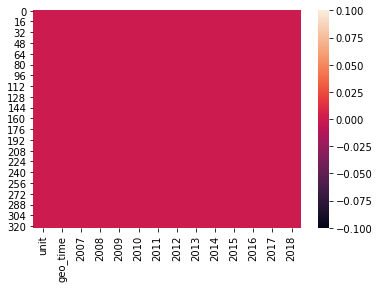

In [6]:
sns.heatmap(gdp.isnull())

In [7]:
for i in range(2007,2019):
    gdp["{}".format(i)] = gdp["{}".format(i)].str.replace(" b","")
    gdp["{}".format(i)] = gdp["{}".format(i)].str.replace(" e","")
    gdp["{}".format(i)] = gdp["{}".format(i)].str.replace(" p","") 
    gdp["{}".format(i)] = gdp["{}".format(i)].str.replace(" d","")        

In [8]:
gdp.replace(": ", np.NaN, inplace=True)
for i in range(2007,2019):
    gdp["{}".format(i)] = gdp["{}".format(i)].astype("Float32")

In [9]:
gdp.isnull().sum()

unit         0
geo_time     0
2007        41
2008        31
2009        31
2010        31
2011        31
2012        27
2013        27
2014        27
2015         0
2016         0
2017         0
2018        11
dtype: int64

In [10]:
gdp.drop('unit', axis =1, inplace = True)
gdp["geo_location"] = gdp['geo_time'].str[0:2]
gdp.set_index(gdp.columns[-1], inplace=True)
gdp.reset_index(inplace=True)
gdp.drop('geo_time', axis =1, inplace = True)

In [11]:
print(gdp.columns)
print(len(gdp.columns))

Index(['geo_location', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')
13


<AxesSubplot:>

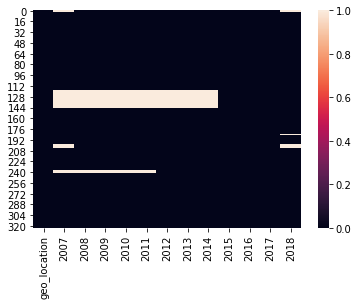

In [12]:
sns.heatmap(gdp.isnull())

## Analysis part begins from here

In [13]:
# 1. Group by country GDP consumption value

In [14]:
gdp_2 = gdp.groupby('geo_location').sum()

In [15]:
gdp_2.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
geo_location,,,,,,,,,,,,
AL,0.0,19300.0,19800.0,21700.0,22800.0,23600.0,22900.0,24500.0,25800.0,25400.0,26700.0,0.0
AT,283700.0,284400.0,271100.0,280600.0,293400.0,308200.0,309500.0,317000.0,332400.0,331700.0,337300.0,350000.0
BE,320700.0,317700.0,303700.0,323600.0,325300.0,336000.0,337400.0,348900.0,364400.0,364900.0,371800.0,381600.0
BG,56300.0,60200.0,56700.0,59300.0,62600.0,65400.0,64900.0,69300.0,73000.0,75700.0,79000.0,83000.0
CY,27100.0,27500.0,25800.0,25600.0,25100.0,24100.0,22300.0,22200.0,23800.0,25400.0,26400.0,27600.0


<AxesSubplot:xlabel='geo_location'>

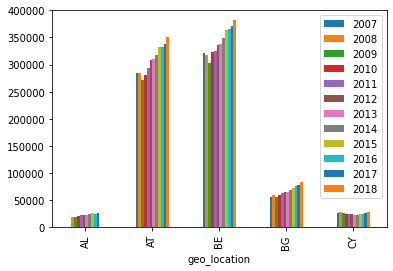

In [16]:
gdp_2.head().plot.bar()

In [17]:
# 2. country's max and min gdp till 2019

In [18]:
maxi = gdp_2.max(axis =1)
mini = gdp_2.min(axis =1)

In [19]:
maximum = maxi.to_frame()
maximum.columns=("Maximum",)

minimum = mini.to_frame()
minimum.columns=("Minimum",)

max_min = pd.DataFrame()
max_min["Maximum"] = maximum["Maximum"]
max_min["Minimum"] = minimum["Minimum"]

In [20]:
max_min.head()

,Maximum,Minimum
geo_location,,
AL,26700.0,0.0
AT,350000.0,271100.0
BE,381600.0,303700.0
BG,83000.0,56300.0
CY,27600.0,22200.0


<AxesSubplot:xlabel='geo_location'>

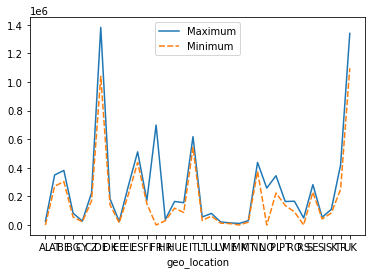

In [21]:
sns.lineplot(data=max_min)

In [22]:
# 3. min and max gdp of a country in 2018

In [23]:
min_5 = gdp_2[['2018']][(gdp_2[['2018']] != 0).all(1)].nsmallest(5, '2018')
max_5 = gdp_2[['2018']].nlargest(5, '2018')

In [24]:
min_5

,2018
geo_location,
ME,14800.0
LV,21300.0
EE,25300.0
CY,27600.0
MT,30200.0


In [25]:
max_5

,2018
geo_location,
DE,1382400.0
UK,1340000.0
FR,699000.0
IT,617800.0
ES,511800.0


<AxesSubplot:xlabel='geo_location'>

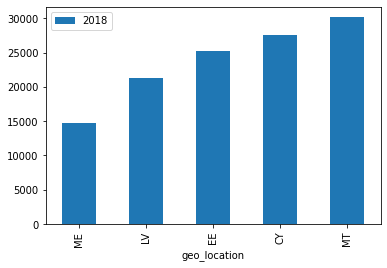

In [26]:
min_5.plot.bar()

<AxesSubplot:xlabel='geo_location'>

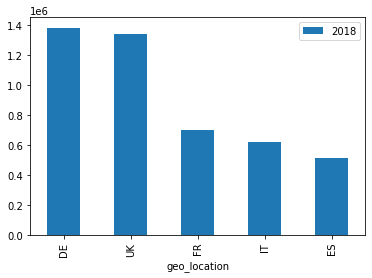

In [27]:
max_5.plot.bar()

In [28]:
# 4. mean consumption over the years

In [29]:
mean = gdp_2.mean(axis = 1)

<AxesSubplot:xlabel='geo_location'>

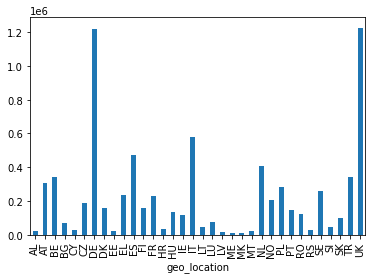

In [30]:
mean.plot.bar()

In [31]:
# 5. median consumption over the years

In [32]:
median = gdp_2.median(axis = 1)
median_gdp = median.to_frame()
median_gdp.columns=("Median",)

mean_gdp = mean.to_frame()
mean_gdp.columns=("Mean",)

m_m = pd.DataFrame()
m_m["Mean"] = mean_gdp["Mean"]
m_m["Median"] = median_gdp["Median"]

<AxesSubplot:xlabel='geo_location'>

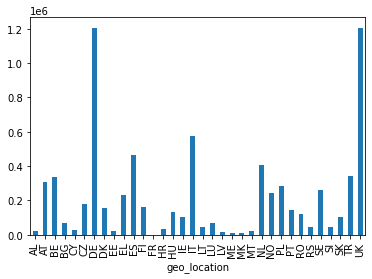

In [33]:
median.plot.bar()

In [34]:
m_m.head() # mean vs median

,Mean,Median
geo_location,,
AL,19375.000000,22850.0
AT,308275.000000,308850.0
BE,341333.343750,336700.0
BG,67116.664062,65150.0
CY,25241.666016,25500.0


<AxesSubplot:xlabel='geo_location'>

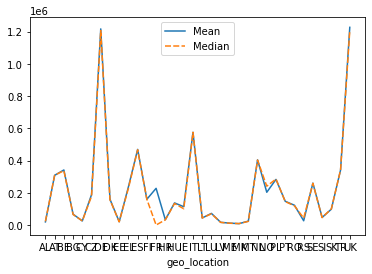

In [35]:
sns.lineplot(data=m_m)

In [36]:
# 6. total consumption in a year

In [37]:
total_year_wise = gdp_2.sum()

In [38]:
total_year_wise.head()

2007    6765900.0
2008    7048400.0
2009    6597700.0
2010    6879800.0
2011    7066500.0
dtype: float32

<AxesSubplot:>

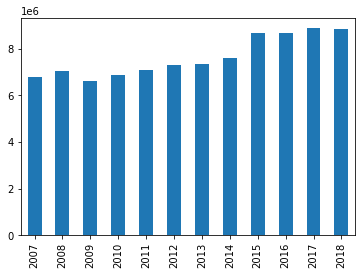

In [39]:
total_year_wise.plot.bar()

In [40]:
# 7. % increase or decrease in gdp

In [41]:
percent_change = gdp_2.pct_change()

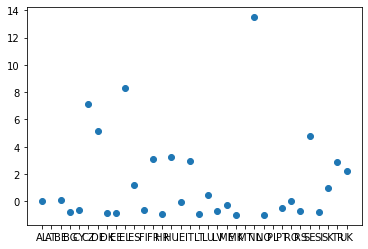

In [42]:
plt.scatter(percent_change.index,percent_change['2018'].fillna(0))